In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get data

In [2]:
startlist = pd.read_csv("../data/vasaloppet_2023_startlist.csv")
results = pd.read_csv("../data/vasaloppet_2022.csv")

In [3]:
#df = pd.merge(startlist, results, left_on=["Name", "Age class"], right_on=["Name", "Age class"])
df = pd.merge(startlist, results, left_on=["Name"], right_on=["Name"])

In [4]:
df.shape

(8642, 8)

In [5]:
df.head()

,Name,Age class_x,Start group,Team_x,Team_y,Age class_y,Place (gender),Time
0,"A. Jönsson, Alexander (SWE)",H35,VL4,Alvesta SOK,Alvesta SOK,H35,3010,06:08:18
1,"Aagaard, Peter (DEN)",H65,VL7,"<span class=""text-muted"">–</span>","<span class=""text-muted"">–</span>",H65,5777,07:50:37
2,"Aagaard, Thomas (DEN)",H55,VL5,"<span class=""text-muted"">–</span>","<span class=""text-muted"">–</span>",H55,4388,06:55:23
3,"Aarmo, Roger (NOR)",H50,VL6,"<span class=""text-muted"">–</span>","<span class=""text-muted"">–</span>",H50,4451,06:57:53
4,"Aasa, Annika (SWE)",D60,VL7,IK Uven,IK Uven,D55,650,08:09:43


In [6]:
duplicates = df.duplicated(subset=["Name", "Place (gender)", "Time"], keep=False)
df.loc[duplicates]

,Name,Age class_x,Start group,Team_x,Team_y,Age class_y,Place (gender),Time
121,"Andersson, Alexander (SWE)",H21,VL7,AXA SC,Redvägs SK,H21,5294,07:30:47
122,"Andersson, Alexander (SWE)",H21,VL7,AXA SC,Röbäcks SK,H21,9889,11:47:24
123,"Andersson, Alexander (SWE)",H21,VL6,Redvägs SK,Redvägs SK,H21,5294,07:30:47
124,"Andersson, Alexander (SWE)",H21,VL6,Redvägs SK,Röbäcks SK,H21,9889,11:47:24
125,"Andersson, Anders (SWE)",H21,VL6,Högsäters Skidklubb,Högsäters Skidklubb,H21,4444,06:57:42
...,...,...,...,...,...,...,...,...
8537,"Åberg, Johan (SWE)",H21,VL4,Heby AIF,OK Landehof,H55,3786,06:34:54
8562,"Åkesson, Fredrik (SWE)",H21,VL10,OK Nackhe,AXA SC,H35,8071,09:43:48
8563,"Åkesson, Fredrik (SWE)",H40,VL8,AXA SC,AXA SC,H35,8071,09:43:48
8568,"Åkesson, Peter (SWE)",H55,VL3,Edsbyns SK,Edsbyns SK,H50,1258,05:07:03


In [9]:
#df.drop_duplicates(subset=["Name", "Age class", "Place (gender)", "Time"], inplace=True)

# I don't care about the team really
# Order by start group and keep first entry (original start group, most likely to be based on results from Vasaloppet 2022)
df = df.sort_values(by="Start group", ascending=False).drop_duplicates(subset=["Name", "Team_y", "Age class_y", "Place (gender)", "Time"])
df.shape

(6222, 8)

In [12]:
df.tail()

,Name,Age class_x,Start group,Team_x,Team_y,Age class_y,Place (gender),Time
1713,"Ek, Kristian (SWE)",H21,VL0,XC Sthlm Ski Club,XC Sthlm Ski Club,H21,405,04:24:35
7493,"Skaug Mathisen, Runar (NOR)",H21,VL0,"<span class=""text-muted"">–</span>",Lager 157 Ski Team,H21,22,03:34:58
6442,"Nylund, Matias (FIN)",H35,VL0,"<span class=""text-muted"">–</span>","<span class=""text-muted"">–</span>",H21,150,04:00:54
2168,"Erkers, Frida (SWE)",D21,VL0,IFK Mora SK,Team Robinson Trentino,D21,19,04:18:14
8641,"Öyre Slind, Astrid (NOR)",D35,VL0,"<span class=""text-muted"">–</span>",Team Koteng Eidissen,D21,1,03:50:06


## Data cleaning

In [13]:
df[["hours", "minutes", "seconds"]] = df.Time.str.split(":", expand=True)
df.head()

,Name,Age class_x,Start group,Team_x,Team_y,Age class_y,Place (gender),Time,hours,minutes,seconds
3274,"Jansson, Anders (SWE)",H60,VL9,IFK Sala,BillerudKorsnäs Frövi KF,H50,3957,06:40:33,06,40,33
3070,"Holtstad Sandberg, Monica (SWE)",D60,VL9,AXA SC,AXA SC,D55,1920,11:53:41,11,53,41
794,"Andersson, Torbjörn (SWE)",H50,VL9,Ölands SK,Ölands SK,H50,9093,10:43:15,10,43,15
796,"Andersson, Ulf (SWE)",H55,VL9,Falun Borlänge SK,Orsa sk,H65,5966,07:58:01,07,58,01
797,"Andersson, Ulf (SWE)",H55,VL9,Falun Borlänge SK,Falun Borlänge SK,H55,9256,10:54:05,10,54,05


In [14]:
df["time_hours"] = df["hours"].astype(float) + df["minutes"].astype(float) / 60 + df["seconds"].astype(float) / (60*60)
df.head()

,Name,Age class_x,Start group,Team_x,Team_y,Age class_y,Place (gender),Time,hours,minutes,seconds,time_hours
3274,"Jansson, Anders (SWE)",H60,VL9,IFK Sala,BillerudKorsnäs Frövi KF,H50,3957,06:40:33,06,40,33,6.675833
3070,"Holtstad Sandberg, Monica (SWE)",D60,VL9,AXA SC,AXA SC,D55,1920,11:53:41,11,53,41,11.894722
794,"Andersson, Torbjörn (SWE)",H50,VL9,Ölands SK,Ölands SK,H50,9093,10:43:15,10,43,15,10.720833
796,"Andersson, Ulf (SWE)",H55,VL9,Falun Borlänge SK,Orsa sk,H65,5966,07:58:01,07,58,01,7.966944
797,"Andersson, Ulf (SWE)",H55,VL9,Falun Borlänge SK,Falun Borlänge SK,H55,9256,10:54:05,10,54,05,10.901389


In [16]:
df["gender"] = df["Age class_y"].str[0]
df.tail()

,Name,Age class_x,Start group,Team_x,Team_y,Age class_y,Place (gender),Time,hours,minutes,seconds,time_hours,gender
1713,"Ek, Kristian (SWE)",H21,VL0,XC Sthlm Ski Club,XC Sthlm Ski Club,H21,405,04:24:35,04,24,35,4.409722,H
7493,"Skaug Mathisen, Runar (NOR)",H21,VL0,"<span class=""text-muted"">–</span>",Lager 157 Ski Team,H21,22,03:34:58,03,34,58,3.582778,H
6442,"Nylund, Matias (FIN)",H35,VL0,"<span class=""text-muted"">–</span>","<span class=""text-muted"">–</span>",H21,150,04:00:54,04,00,54,4.015000,H
2168,"Erkers, Frida (SWE)",D21,VL0,IFK Mora SK,Team Robinson Trentino,D21,19,04:18:14,04,18,14,4.303889,D
8641,"Öyre Slind, Astrid (NOR)",D35,VL0,"<span class=""text-muted"">–</span>",Team Koteng Eidissen,D21,1,03:50:06,03,50,06,3.835000,D


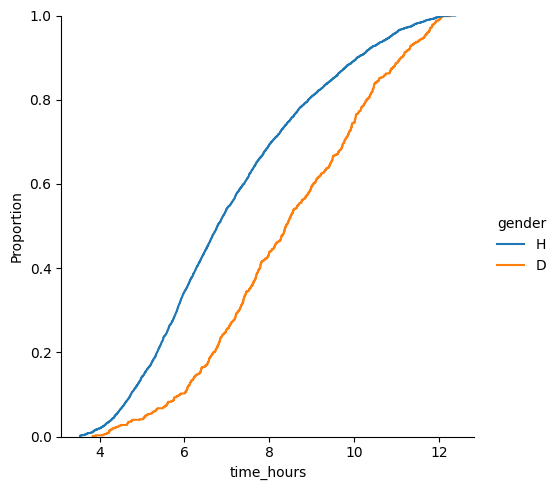

In [17]:
sns.displot(data=df.loc[df.gender != "<"], x="time_hours", hue="gender", kind="ecdf")

## Analysis by start group

In [18]:
START_GROUPS = ["VL0", "VL1", "VL2", "VL3", "VL4", "VL5", "VL6", "VL7", "VL8", "VL9", "VL10"]

In [19]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

df.groupby("Start group").agg({"time_hours": ["count", "mean", "std", q1, "median", q3]}).loc[START_GROUPS].round(1)

time_hours                            
                 count mean  std   q1 median    q3
Start group                                       
VL0                209  4.2  0.9  3.8    4.0   4.2
VL1                280  4.7  0.9  4.3    4.5   4.6
VL2                392  5.2  1.0  4.7    4.9   5.2
VL3                611  5.6  0.9  5.2    5.4   5.6
VL4                726  6.2  0.9  5.8    6.0   6.2
VL5                860  7.0  1.1  6.5    6.7   7.0
VL6                748  7.5  0.9  7.2    7.4   7.7
VL7                701  8.2  1.0  7.9    8.2   8.5
VL8                859  8.9  1.4  8.7    9.2   9.7
VL9                711  9.8  2.0  9.1   10.5  11.2
VL10               125  8.3  2.3  6.5    8.2  10.3

In [20]:
# Separate analysis of position by gender
df.loc[df["gender"] != "<"].groupby(["gender", "Start group"]).agg({"Place (gender)": ["count", "min", q1, "median", q3, "max"]})

Place (gender)                                      
                            count  min       q1  median       q3    max
gender Start group                                                     
D      VL0                     31    1    14.50    25.0    41.50     85
       VL1                      1   52    52.00    52.0    52.00     52
       VL10                    16   38   486.25   810.0  1431.00   1988
       VL2                      4   46    55.00    93.5   500.25   1614
       VL3                     21   60    72.00    90.0   139.00   1418
       VL4                     46   43   135.00   157.0   187.00    659
       VL5                     69  186   233.00   275.0   310.00    781
       VL6                     90  268   376.50   448.5   512.75   1383
       VL7                     98   53   598.25   674.5   734.75   1902
       VL8                    142  122   904.75  1035.5  1155.50   1680
       VL9                    136   55  1362.00  1557.5  1799.25   1974
H      VL0                    177    1    57.00   119.0   211.00   9205
       VL1                    279  161   336.50   450.0   641.50   9489
       VL10                   109   62  3095.00  6070.0  8624.00  10052
       VL2                    388  504   747.75   959.5  1381.25  10006
       VL3                    589  236  1415.00  1737.0  2064.00   9397
       VL4                    680   41  2391.75  2755.5  3094.75  10007
       VL5                    791  152  3584.50  4020.0  4457.50  10060
       VL6                    657  241  4728.00  5138.0  5507.00  10028
       VL7                    603  197  5800.50  6235.0  6678.50   9889
       VL8                    716  292  6871.25  7477.0  8004.50  10025
       VL9                    574   25  6372.75  8786.5  9367.25  10023

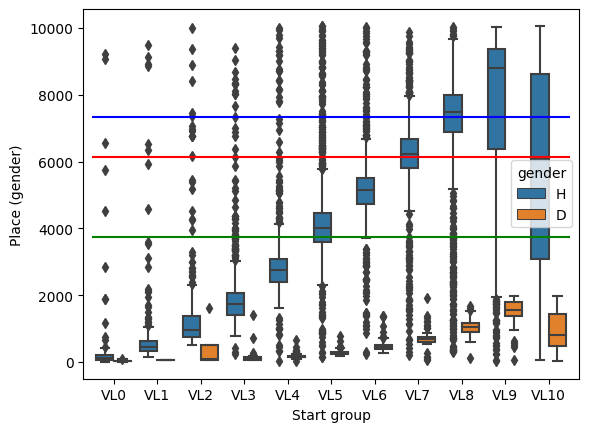

In [21]:
sns.boxplot(data=df.loc[df.gender != "<"], x="Start group", y="Place (gender)", hue="gender", order=START_GROUPS)
plt.hlines(y=7342, xmin=-0.5, xmax=10.5, colors="blue")  # Morgan
plt.hlines(y=3747, xmin=-0.5, xmax=10.5, colors="green")  # Tobias
plt.hlines(y=6145, xmin=-0.5, xmax=10.5, colors="red")  # Philip


In [22]:
# Percentiles?
# 10042 male completers
df.loc[df["gender"] == "H"].groupby("Start group").agg({"Place (gender)": [q1, "median", q3]}).loc[START_GROUPS] / 10042

Place (gender)                    
                        q1    median        q3
Start group                                   
VL0               0.005676  0.011850  0.021012
VL1               0.033509  0.044812  0.063882
VL2               0.074462  0.095549  0.137547
VL3               0.140908  0.172974  0.205537
VL4               0.238175  0.274398  0.308181
VL5               0.356951  0.400319  0.443886
VL6               0.470823  0.511651  0.548397
VL7               0.577624  0.620892  0.665057
VL8               0.684251  0.744573  0.797102
VL9               0.634610  0.874975  0.932807
VL10              0.308206  0.604461  0.858793

In [23]:
# The 66th percentile seems to be just within the central range of VL7!
# If the same holds this year, I should end up there

print(f"Morgan 2022: {7342/10042:.2f}")
print(f"Philip 2022: {6145/10042:.2f}")
print(f"Tobias 2022: {3747/9994:.2f}")
print("\n")
print(f"Morgan 2023: {6549/9994:.2f}")
print(f"Philip 2023: {7406/9994:.2f}")
print(f"Tobias 2023: {4883/9994:.2f}")

Morgan 2022: 0.73
Philip 2022: 0.61
Tobias 2022: 0.37


Morgan 2023: 0.66
Philip 2023: 0.74
Tobias 2023: 0.49
